### Making imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')

#### Dataset info

Age | Objective Feature | age | int (days)

Height | Objective Feature | height | int (cm) |

Weight | Objective Feature | weight | float (kg) |

Gender | Objective Feature | gender | categorical code |

Systolic blood pressure | Examination Feature | ap_hi | int |

Diastolic blood pressure | Examination Feature | ap_lo | int |

Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

Smoking | Subjective Feature | smoke | binary |

Alcohol intake | Subjective Feature | alco | binary |

Physical activity | Subjective Feature | active | binary |

Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset

#### Making 'id' column the index

In [3]:
df['id'].nunique()

70000

In [4]:
df = df.set_index('id')

In [5]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


#### Checking for null values

In [7]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Exploring the statistics of the dataset

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


#### Displaying the correlation of all the features to the label
##### All the features appear to have weak correlation to the label

In [9]:
df.corr()['cardio']

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
cardio         1.000000
Name: cardio, dtype: float64

<AxesSubplot:>

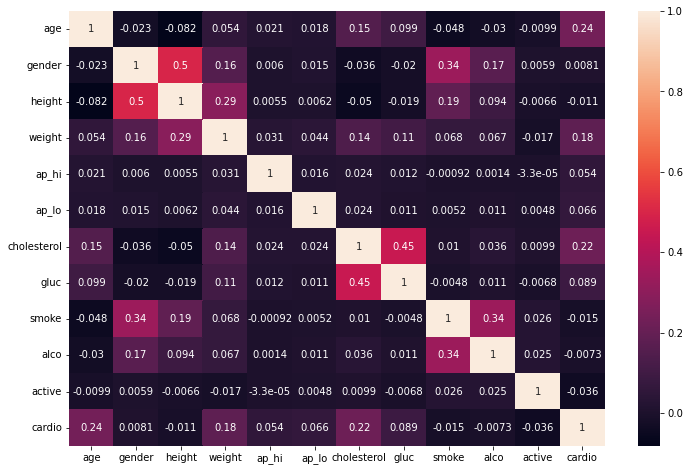

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

#### Checking if the label is balanced

In [11]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

# PART 1
## Preparing data for machine learning
#### separating the features from the label

In [12]:
X = df.drop('cardio',axis=1)
y = df['cardio']

#### Performing train-test split with test size 10%

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

#### Performing feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Creating a base logistic regression model

In [18]:
from sklearn.linear_model import LogisticRegression

#### Using saga solver because it handles l1, l2 and elasticnet penalties

In [19]:
base_model = LogisticRegression(solver='saga',max_iter=5000)

#### Creating a Gridsearch model so that I can use cross validation to test out lists of hyperparameters

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
parameter_grid = {'penalty':['l1','l2','elasticnet'],'C':[0.1,1,10,100],'l1_ratio':[0.1,0.5,0.95,1]}

In [22]:
grid_model = GridSearchCV(base_model,param_grid=parameter_grid,scoring='roc_auc')

#### Training the model

In [23]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.95, 1],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='roc_auc')

### Exploring the best performing model

In [24]:
grid_model.best_estimator_

LogisticRegression(C=100, l1_ratio=1, max_iter=5000, penalty='l1',
                   solver='saga')

In [25]:
grid_model.best_params_

{'C': 100, 'l1_ratio': 1, 'penalty': 'l1'}

In [26]:
pd.DataFrame(grid_model.cv_results_)[['mean_test_score','params']].sort_values('mean_test_score',ascending=False)

,mean_test_score,params
45,0.783398,"{'C': 100, 'l1_ratio': 1, 'penalty': 'l1'}"
42,0.783398,"{'C': 100, 'l1_ratio': 0.95, 'penalty': 'l1'}"
39,0.783397,"{'C': 100, 'l1_ratio': 0.5, 'penalty': 'l1'}"
36,0.783397,"{'C': 100, 'l1_ratio': 0.1, 'penalty': 'l1'}"
44,0.783397,"{'C': 100, 'l1_ratio': 0.95, 'penalty': 'elast..."
47,0.783397,"{'C': 100, 'l1_ratio': 1, 'penalty': 'elasticn..."
41,0.783396,"{'C': 100, 'l1_ratio': 0.5, 'penalty': 'elasti..."
46,0.783395,"{'C': 100, 'l1_ratio': 1, 'penalty': 'l2'}"
43,0.783394,"{'C': 100, 'l1_ratio': 0.95, 'penalty': 'l2'}"
38,0.783394,"{'C': 100, 'l1_ratio': 0.1, 'penalty': 'elasti..."


## Evaluating our model on the test set

In [27]:
y_pred = grid_model.predict(scaled_X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

### Final model metrics
#### Model had an roc-auc score of 78% and acuracy of 72%

In [29]:
accuracy_score(y_test,y_pred)

0.7218571428571429

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      3539
           1       0.74      0.68      0.71      3461

    accuracy                           0.72      7000
   macro avg       0.72      0.72      0.72      7000
weighted avg       0.72      0.72      0.72      7000



In [31]:
y_prob = grid_model.predict_proba(scaled_X_test)

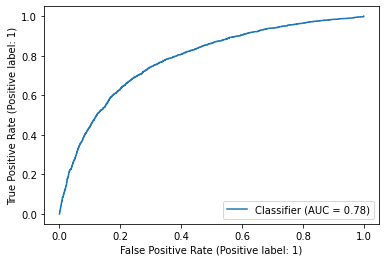

In [32]:
RocCurveDisplay.from_predictions(y_test,y_prob[:,1])

# PART 2
## Logistic Regression was chosen because of interpretability

#### NOTE: The model below was trained on the full unregularized dataet for the sole purpose of interpretng features. 
#### It is not intended for prediction, performance evaluation or deployment

In [35]:
inter_model = LogisticRegression(penalty = 'none',max_iter=1000)

In [36]:
inter_model.fit(X,y)

LogisticRegression(max_iter=1000, penalty='none')

In [37]:
inter_model.coef_

array([[ 9.66962117e-05,  1.13461868e-01, -4.91076737e-02,
         1.83972680e-02,  3.24690060e-02,  3.72199324e-04,
         4.26392707e-01,  7.67989980e-02,  6.34417228e-03,
        -8.13628572e-03, -1.03966242e-01]])

In [38]:
feature_names = X.columns

In [39]:
odds_ratios = np.exp(inter_model.coef_[0])

In [40]:
result_df = pd.DataFrame({
    'Feature': feature_names,
    'Odds Ratio (per unit)': odds_ratios
}).sort_values(by='Odds Ratio (per unit)', ascending=False)

print(result_df)

        Feature  Odds Ratio (per unit)
6   cholesterol               1.531722
1        gender               1.120149
7          gluc               1.079825
4         ap_hi               1.033002
3        weight               1.018568
8         smoke               1.006364
5         ap_lo               1.000372
0           age               1.000097
9          alco               0.991897
2        height               0.952079
10       active               0.901256


### Logistic regression revealed notably that increasing cholesterol levels have the strongest association with cardiovascular disease, with a 50% increase in odds for each category increase.

## Saving Model
#### retraining on all the data now

In [41]:
final_model = grid_model.best_estimator_

In [42]:
final_model.fit(X,y)

LogisticRegression(C=100, l1_ratio=1, max_iter=5000, penalty='l1',
                   solver='saga')

In [43]:
from joblib import dump,load

In [44]:
dump(final_model,'final_cardio_model.joblib')
dump(scaler,'cardio_scaler.pkl')

['cardio_scaler.pkl']